In [17]:
import numpy as np
import matplotlib.pyplot as plt
from classes.minicluster import AxionMiniclusterNFW
from classes.particles import Particles
from classes.ns import NeutronStar
from scripts.orbits import evolve_AC
from scripts.basic_functions import mag_vector
from scipy.spatial import ConvexHull

In [18]:
M_MC = 1
MC = AxionMiniclusterNFW(M_MC, Particles.axionmass)
MC.center, MC.vcenter = [0.2*MC.radius_trunc(), 1e16, 0.], [0, -200., 0]

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:37: RuntimeWarning: divide by zero encountered in true_divide
  return self.rho_s()/(distances/self.rs()*np.power(1 + distances/self.rs(), 2))*np.heaviside(self.radius_trunc() - distances, 1)


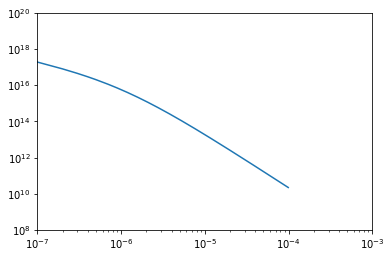

In [19]:
km_to_pc = 3.086*1e13
rs_plot = np.linspace(0, MC.radius_trunc(), 1000)
positions_plot = np.array([np.array([r_plot, 0, 0]) + MC.center for r_plot in rs_plot])
plt.plot(rs_plot/km_to_pc, np.power(km_to_pc,3)*MC.density_profile(positions_plot))
plt.xscale("log")
plt.yscale("log")
plt.xlim(left = 1e-7, right = 1e-3);
plt.ylim(top = 1e20, bottom = 1e8);

In [20]:
MC.encl_mass([np.array([MC.radius_trunc(),0,0]) + np.array(MC.center)])[0]

0.9999999999999971

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return -4e-10*np.pi*G_N*self.rho_s()*np.power(self.rs(), 3)/distances*np.log((distances + self.rs())/self.rs())
c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:42: RuntimeWarning: invalid value encountered in multiply
  return -4e-10*np.pi*G_N*self.rho_s()*np.power(self.rs(), 3)/distances*np.log((distances + self.rs())/self.rs())


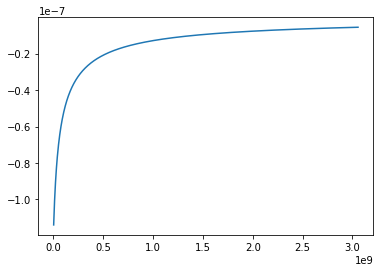

In [21]:
fake_positions = np.array([[r_plot,0,0] for r_plot in rs_plot])
plt.plot(rs_plot, MC.gravitational_potential(fake_positions + MC.center));

c:\Users\gsali\Dropbox\PC (2)\Documents\GitHub\axionns\classes\minicluster.py:55: RuntimeWarning: invalid value encountered in true_divide
  return 1e-5*np.sqrt(G_N*self.encl_mass(positions)/mag_vector(positions_from_center))


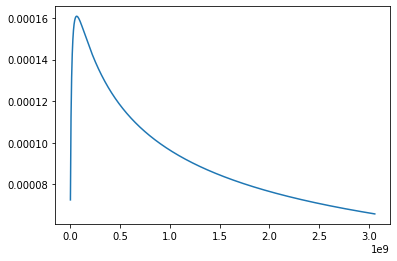

In [22]:
plt.plot(rs_plot, MC.circ_v(fake_positions + MC.center))

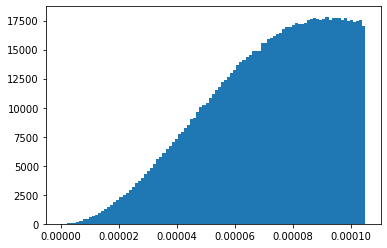

In [23]:
fake_position = np.array([MC.radius_trunc(),0, 0]) + MC.center
mag_vs = mag_vector(MC.draw_vs(fake_position, multiplier=1000000))
plt.hist(mag_vs, bins = np.linspace(0, MC.v_esc(fake_position)[0], 100));

In [24]:
NS = NeutronStar(1, 10)
bmax = MC.max_impact_param(NS)

In [25]:
evolve_AC(MC, NS)

In [26]:
nparticles = 10000
positions0, velocities0, mass_in = MC.draw_particles(nparticles, 1.2*MC.radius_trunc())

In [27]:
mass_in

1.033497018183829

In [28]:
ch0 = ConvexHull(positions0)
ch0.volume

1.0204673992807156e+29

In [29]:
4*np.pi*np.power(MC.radius_trunc(), 3)/3.

1.1966771782024006e+29

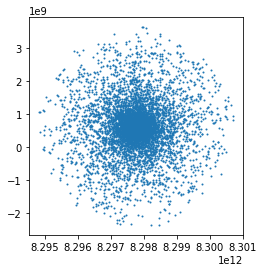

In [30]:
plt.scatter(np.unique(positions0, axis=0).T[1], np.unique(positions0, axis=0).T[0], s = 1)
ax = plt.gca()
ax.set_aspect('equal')

In [31]:
nparticles = 1000
bmax += 3*mag_vector(MC.center)/mag_vector(MC.vcenter)*MC.circ_v([np.array([MC.radius_trunc(),0,0]) + MC.center])[0]
positions, velocities, mass_in = MC.draw_particles(nparticles, bmax)

In [32]:
mass_in

2.259527751053175e-05

In [33]:
positions

array([[-4.76374377e+06,  8.29811827e+12, -2.87555820e+06],
       [-4.76374377e+06,  8.29811827e+12, -2.87555820e+06],
       [-4.76374377e+06,  8.29811827e+12, -2.87555820e+06],
       ...,
       [ 1.40686706e+06,  8.29800831e+12, -3.26577768e+06],
       [ 1.40686706e+06,  8.29800831e+12, -3.26577768e+06],
       [ 1.40686706e+06,  8.29800831e+12, -3.26577768e+06]])

In [34]:
ch = ConvexHull(positions)
ch.volume

8.798860499376084e+23

In [35]:
velocities

array([[ 1.16243438e-04, -2.00000133e+02,  3.38301156e-05],
       [-1.23200777e-05, -2.00000109e+02, -7.23853614e-05],
       [ 1.99626901e-05, -1.99999999e+02, -9.48546298e-06],
       ...,
       [-4.12469548e-05, -2.00000158e+02, -9.76447408e-06],
       [ 2.56079927e-05, -2.00000071e+02,  1.30551945e-04],
       [-9.58155919e-05, -2.00000096e+02,  6.23255838e-05]])

In [36]:
all_ms = []

for i in np.arange(1000):
    cylinder = MC.bmax_cylinder(100, MC.center[0] + MC.radius_trunc(), resolution=1000)
    all_ms.append(cylinder[1])

np.mean(all_ms)

0.9842307996147106

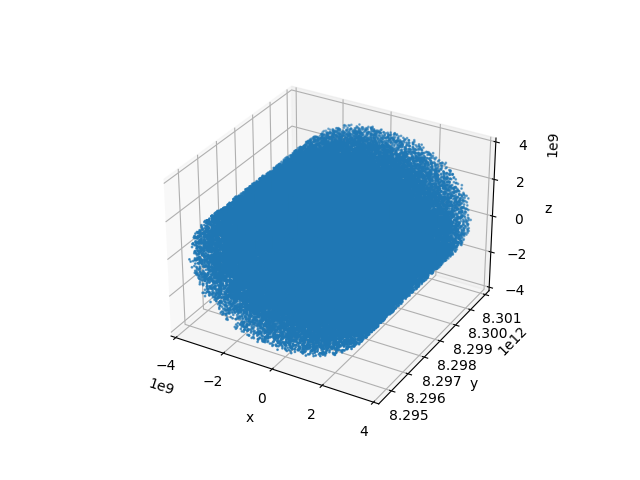

In [37]:
%matplotlib widget

X, Y, Z = cylinder[0].T
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z, s = 1);

ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');

In [ ]:
particles = Particles([], [])
rcmax = NS.conversion_radius_max(Particles.axionmass)
while particles.nparticles < 1000:
    positions, velocities = MC.draw_particles(1000, bmax, multiplier=1000)
    particles.add_particles([np.array([0.]*len(positions))], positions, velocities, np.array([[None, None, None]]*len(positions)))
    particles.remove_particles_far(rcmax, NS)

print(particles.nparticles)
particles.remove_particles(np.arange(100, particles.nparticles))
print(particles.nparticles)

107
100


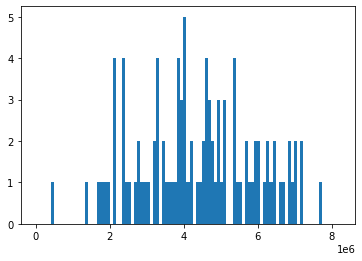

In [ ]:
bs = np.sort(np.array(list(set([mag_vector([position[0], position[2]]) for position in particles.positions]))))
plt.hist(bs, bins = np.linspace(0, bmax, 100));